In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv
/kaggle/input/regions/countryContinent.csv


In [239]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [12]:
dfs=pd.read_csv('../input/suicide-rates-overview-1985-to-2016/master.csv')
dfs.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [16]:
dft= dfs.country.unique()
dft

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [25]:
dfr=pd.read_csv('../input/regions/countryContinent.csv')
dfr.head()
# dft2=dfr.country.unique()
# dft2

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,�land Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [14]:
def mismatch (series_1, series_2, only_out=True):
    out_num = 0
    for i in series_1.unique():
        if i in series_2.unique():
#         if any(series_2.unique() == i):  # alternative
            if not only_out:
                print("in :",i)
        else:
            print("out :",i)
            out_num += 1
    print(f"{out_num} mismatch(es) between those dataframes".upper())
    
mismatch(dfs.country, dfr.country, True)

out : Macau
out : Republic of Korea
out : Saint Vincent and Grenadines
out : United Kingdom
out : United States
5 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [22]:
dfr.loc[dfr.country.str.contains("Maca"),'country']='Macau'
dfr.loc[dfr.country.str.contains("'Korea \(Republic of\)'"),'country']='Republic of Korea'
dfr.loc[dfr.country.str.contains("United Kingdom of Great Britain and Northern Ireland"),'country']='United Kingdom'
dfr.loc[dfr.country.str.contains("Saint Vincent and the Grenadines"),'country']='Saint Vincent and Grenadines'
dfr.loc[dfr.country.str.contains("United States of America"),'country']='United States'
mismatch(dfs.country, dfr.country, True)

out : Republic of Korea
1 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [24]:
dfr.loc[dfr.country.str.contains("Korea \(Republic of\)"),'country']='Republic of Korea'
mismatch(dfs.country, dfr.country, True)

0 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [26]:
df3 = dfs.merge(dfr[['country','continent','sub_region','code_3']], left_on='country', right_on='country')
df3

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,continent,sub_region,code_3
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe,Southern Europe,ALB
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Europe,Southern Europe,ALB
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe,Southern Europe,ALB
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Europe,Southern Europe,ALB
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,Europe,Southern Europe,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26387,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,Asia,Central Asia,UZB
26388,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,Asia,Central Asia,UZB
26389,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,Asia,Central Asia,UZB
26390,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,Asia,Central Asia,UZB


In [32]:
print("Shape: ", df3.shape)

Shape:  (26392, 15)


In [33]:
print("Types: ", df3.dtypes)

Types:  country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
continent              object
sub_region             object
code_3                 object
dtype: object


In [39]:
print("Counts: ")
print(df3.apply(lambda x: x.count()))

Counts: 
country               26392
year                  26392
sex                   26392
age                   26392
suicides_no           26392
population            26392
suicides/100k pop     26392
country-year          26392
HDI for year           8040
 gdp_for_year ($)     26392
gdp_per_capita ($)    26392
generation            26392
continent             26392
sub_region            26392
code_3                26392
dtype: int64


In [40]:
print("Nulls: ")
print(df3.apply(lambda x: x.isnull().sum()))

Nulls: 
country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          18352
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
continent                 0
sub_region                0
code_3                    0
dtype: int64


In [43]:
print("Min: ")
print(df3.min())

print("Max: ")
print(df3.max())

Min: 
country                                 Albania
year                                       1985
sex                                      female
age                                 15-24 years
suicides_no                                   0
population                                  278
suicides/100k pop                           0.0
country-year                        Albania1987
HDI for year                              0.483
 gdp_for_year ($)                 1,016,418,229
gdp_per_capita ($)                          251
generation                              Boomers
continent                                Africa
sub_region            Australia and New Zealand
code_3                                      ABW
dtype: object
Max: 
country                   Uzbekistan
year                            2016
sex                             male
age                        75+ years
suicides_no                    22338
population                  28461855
suicides/100k pop             22

In [46]:
# df3[" gdp_for_year ($) "] = df3[" gdp_for_year ($) "].apply(lambda x: int(x.replace(',','')))

print("Min: ")
print(df3.min())

print("Max: ")
print(df3.max())

Min: 
country                                 Albania
year                                       1985
sex                                      female
age                                 15-24 years
suicides_no                                   0
population                                  278
suicides/100k pop                           0.0
country-year                        Albania1987
HDI for year                              0.483
 gdp_for_year ($)                      46919625
gdp_per_capita ($)                          251
generation                              Boomers
continent                                Africa
sub_region            Australia and New Zealand
code_3                                      ABW
dtype: object
Max: 
country                   Uzbekistan
year                            2016
sex                             male
age                        75+ years
suicides_no                    22338
population                  28461855
suicides/100k pop             22

In [47]:
df3.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation', 'continent',
       'sub_region', 'code_3'],
      dtype='object')

In [48]:
df3 = df3.rename(columns={'suicides/100k pop':'suicides_100k',
                       'country-year':'country_year',
                       'HDI for year':'hdi_for_year',
                       ' gdp_for_year ($) ':'gdp_for_year',
                       'gdp_per_capita ($)':'gdp_per_capita'})
df3.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_100k', 'country_year', 'hdi_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation', 'continent', 'sub_region', 'code_3'],
      dtype='object')

In [49]:
df3.drop('hdi_for_year',axis=1,inplace=True)
df3.isnull().any().sum()

0

In [52]:
df3.head()

,country,year,sex,age,suicides_no,population,suicides_100k,gdp_for_year,gdp_per_capita,generation,continent,sub_region,code_3
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X,Europe,Southern Europe,ALB
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent,Europe,Southern Europe,ALB
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X,Europe,Southern Europe,ALB
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation,Europe,Southern Europe,ALB
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers,Europe,Southern Europe,ALB


In [55]:
df3.drop(['country_year'],axis=1,inplace=True)
df3.head()

,country,year,sex,age,suicides_no,population,suicides_100k,gdp_for_year,gdp_per_capita,generation,continent,sub_region,code_3
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X,Europe,Southern Europe,ALB
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent,Europe,Southern Europe,ALB
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X,Europe,Southern Europe,ALB
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation,Europe,Southern Europe,ALB
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers,Europe,Southern Europe,ALB


**Global Suicides(per 100K)-trend over time 1985-2016**

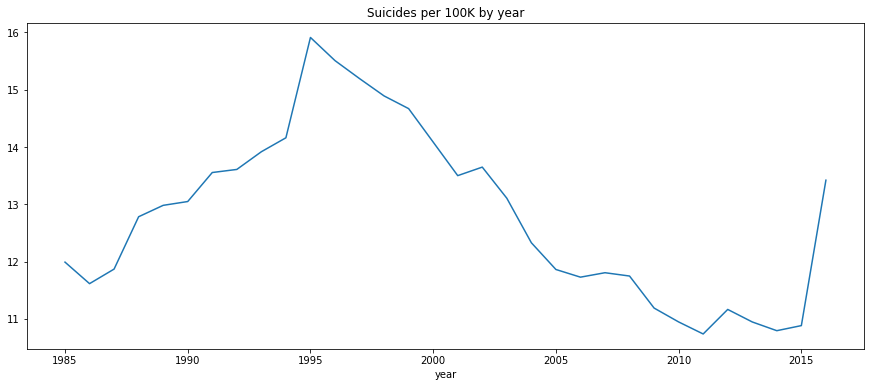

In [64]:
plt.subplots(figsize=(15,6))
df3.groupby('year').suicides_100k.mean().plot.line(rot=0)
plt.title("Suicides per 100K by year");

**Global Suicides(per 100K) by Continent**

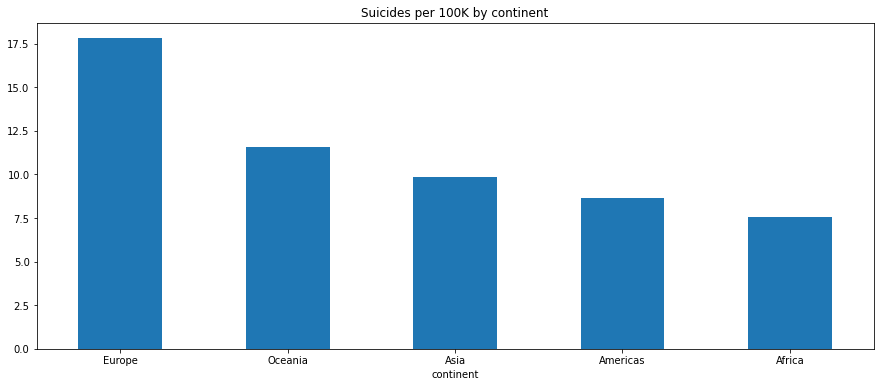

In [65]:
plt.subplots(figsize=(15,6))
df3.groupby('continent').suicides_100k.mean().sort_values(ascending=False).plot.bar(rot=0)
plt.title("Suicides per 100K by continent");

**Global Suicides(per 100k) by Gender and trend over time 1985-2016******

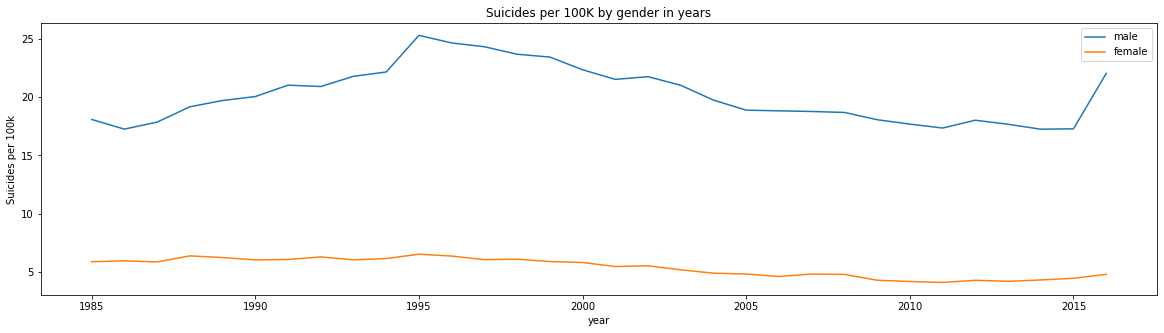

In [86]:
df3gender = pd.pivot_table(df3,values= ['suicides_100k'], 
                     index=['sex','year'], aggfunc='mean').reset_index()
fig, ax = plt.subplots(figsize=(20,5))
for i in ['male','female']:
    ax = df3gender[df3gender.sex==i].groupby('year').suicides_100k.mean().plot(kind='line',label=i)
ax.legend(loc='upper right', borderaxespad=0.5)
ax.set_ylabel('Suicides per 100k')
ax.set_title('Suicides per 100K by gender in years')
plt.show()

**Population-gdp_per_capita Plot**

In [134]:
x = df3.groupby('year').gdp_for_year.sum()
x

year
1985     51727499396760
1986     68921964468780
1987     86629619949060
1988     99241100074344
1989    109681015273524
1990    148236222634872
1991    160391995673112
1992    171279696797076
1993    171120104686428
1994    186796281094608
1995    214690216827876
1996    213960364003800
1997    201984373785708
1998    196959425796756
1999    202066006510992
2000    202436567218488
2001    194815959197940
2002    201195156675408
2003    234532601259792
2004    265158667661172
2005    276909965201436
2006    307134456092928
2007    352405747094400
2008    395977674002100
2009    372383171262336
2010    403853693973540
2011    445910852728824
2012    436012495539780
2013    436198269380700
2014    410146774698168
2015    311756224265292
2016     29252100111210
Name: gdp_for_year, dtype: int64

In [227]:
a= x/y


In [135]:
y = df3.groupby('year').population.sum()
y

year
1985     698064051
1986     716205880
1987     778435122
1988     734730144
1989     903430718
1990    1143426405
1991    1163136257
1992    1239526289
1993    1197285572
1994    1212146137
1995    1251475565
1996    1318654460
1997    1356186129
1998    1374829323
1999    1422867160
2000    1436479192
2001    1389757744
2002    1452276472
2003    1465690559
2004    1369328756
2005    1355742939
2006    1458223433
2007    1474609094
2008    1473380341
2009    1585572201
2010    1603355986
2011    1596268601
2012    1512155178
2013    1486398433
2014    1505170499
2015    1364723779
2016     132101896
Name: population, dtype: int64

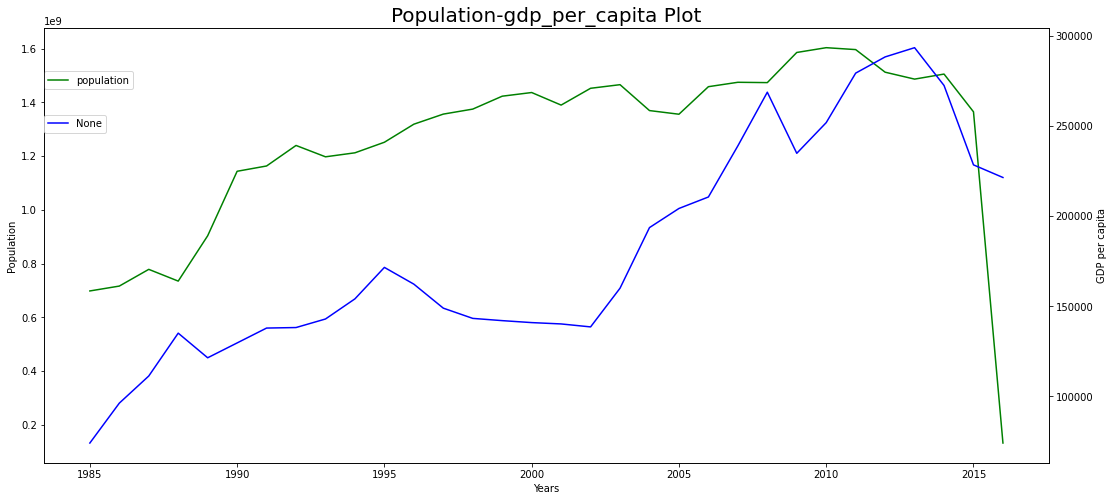

In [229]:
df4=df3.copy()
df4 =df4.set_index('year')

fig, ax = plt.subplots(figsize=(18,8))
y.plot(ax=ax,color='g',xlabel= "Years",ylabel= "Population")
plt.legend(bbox_to_anchor=(0.0, 0.90), loc=2, borderaxespad=0.)

ax2 = ax.twinx()
a.plot(ax=ax2,color='b',ylabel='GDP per capita')
plt.legend(bbox_to_anchor=(0.0, 0.80), loc=2, borderaxespad=0.)

plt.title('Population-gdp_per_capita Plot', fontsize=20)
plt.show()

**Correlation between GDP(per Capita) and suicides per 100k**

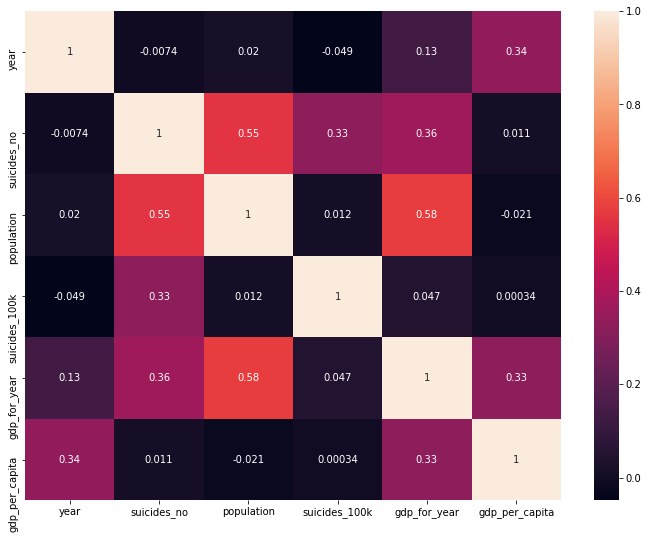

In [234]:
plt.subplots(figsize=(12,9))
sns.heatmap(df3[df3.year!=2016].corr(), annot = True);


**Generation hue Gender Counter**

In [236]:
gen =df3.groupby('generation').sum()
gen

,year,suicides_no,population,suicides_100k,gdp_for_year,gdp_per_capita
generation,,,,,,
Boomers,9468420,1796580,10240027657,69896.48,1308558511272856,73877794
G.I. Generation,5143586,399460,1498818958,62668.42,508426645998254,26022228
Generation X,12138052,1173392,10688867135,64237.64,1627667458878992,92664302
Generation Z,2811094,12582,2015766179,891.51,594107483824190,35290902
Millenials,11150412,487538,8632966364,29940.83,1759342200732834,103614320
Silent,12106880,1446169,7095188022,109728.24,1761663962630084,104067858


**Which age of people suicide a most**

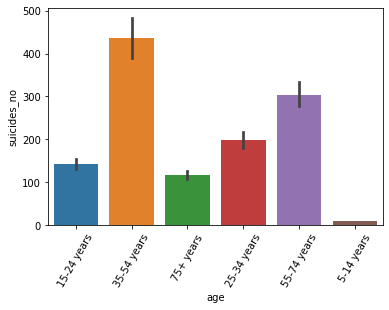

In [246]:
sns.barplot(x="age",y = 'suicides_no',data=df3);
plt.xticks(rotation=60);

**Which generation of people suicide a most**

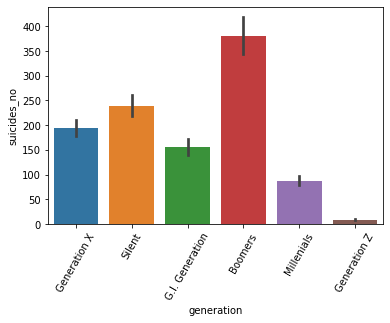

In [245]:
sns.barplot(x="generation",y = 'suicides_no',data=df3);
plt.xticks(rotation=60);